In [2]:
import torch

def hard_threshold(cos_sim_matrix, K):
    # Find the top K connections
    top_k_values, top_k_indices = torch.topk(cos_sim_matrix, K, dim=-1)
    
    # Create a mask for the top K values
    mask = torch.zeros_like(cos_sim_matrix)
    mask.scatter_(1, top_k_indices, 1)
    
    # Create the adjacency matrix
    adjacency_matrix = cos_sim_matrix * mask
    
    return adjacency_matrix

def gaussian_kernel(cos_sim_matrix, gamma):
    adjacency_matrix = torch.exp(-gamma * (1 - cos_sim_matrix))
    return adjacency_matrix

def soft_threshold(cos_sim_matrix, gamma):
    # Apply the Gaussian kernel to create the adjacency matrix
    adjacency_matrix = gaussian_kernel(cos_sim_matrix, gamma)
    
    return adjacency_matrix



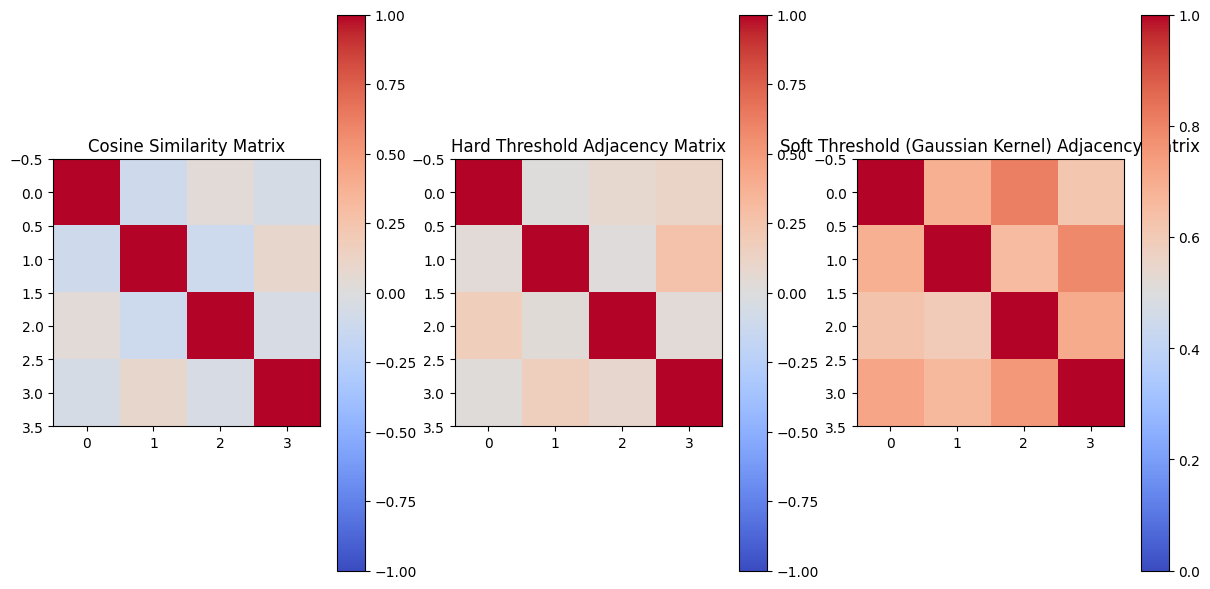

In [58]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Toy embeddings
embeddings = torch.randn(4, 64)

# Calculate cosine similarity matrix
cos_sim_matrix = torch.mm(embeddings, embeddings.t())
cos_sim_matrix = cos_sim_matrix / (embeddings.norm(dim=1) * embeddings.norm(dim=1).view(-1, 1))

# Hard threshold adjacency matrix
K = 3
hard_adj_matrix = hard_threshold(cos_sim_matrix, K) + torch.rand_like(cos_sim_matrix) * 0.2

# Soft threshold adjacency matrix
gamma = 0.5
soft_adj_matrix = soft_threshold(cos_sim_matrix, gamma) + torch.rand_like(cos_sim_matrix) * 0.2

# Visualize the adjacency matrices
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(cos_sim_matrix.detach().numpy(), cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.title('Cosine Similarity Matrix')

plt.subplot(132)
plt.imshow(hard_adj_matrix.detach().numpy(), cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.title('Hard Threshold Adjacency Matrix')

plt.subplot(133)
plt.imshow(soft_adj_matrix.detach().numpy(), cmap='coolwarm', vmin=0, vmax=1)
plt.colorbar()
plt.title('Soft Threshold (Gaussian Kernel) Adjacency Matrix')

plt.tight_layout()
plt.show()


In [39]:
np.random.normal(0, 1, 10) * 0.5

array([ 0.89301218, -0.07029251,  0.22676102, -0.20195202,  0.23701428,
        0.38105922,  0.99451726, -0.19923757,  1.0104142 ,  0.11259005])